conda install jupyter pandas seaborn

In [20]:
import pandas as pd

Завантажити файли movies.dat / ratings.dat / users.dat у змінні, використовуючи методи pandas

In [21]:
movies = pd.read_csv('ml-1m/movies.dat', sep="::", names=["movie_id", "title", "genres"],engine="python")
ratings = pd.read_csv('ml-1m/ratings.dat', sep="::", names=["user_id", "movie_id", "rating", "timestamp"],engine="python")
users = pd.read_csv('ml-1m/users.dat', sep="::", names=["user_id", "gender", "age", "occupation", "zip_code"],engine="python")

Зробити merge даних в єдиний DataFrame

In [22]:
merged_df = pd.merge(movies, ratings, on="movie_id")
merged_df = pd.merge(merged_df, users, on="user_id")
merged_df.head()

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


Зробіть аналіз топ-10 стрічок за рейтингом по кожному полу та кожній віковій підгрупі з розбивкою по статі (14 рейтингів).

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [23]:
age_groups = [1,18,25,35,45,50,56]
genders = ["F","M"]

pd.options.mode.chained_assignment = None
for age in age_groups:
    for gender in genders:
        top_movies = merged_df[(merged_df["gender"] == gender) & (merged_df["age"] == age)]
        top_movies['size'] = top_movies.groupby('title')['title'].transform('size')
        top_movies = top_movies.loc[top_movies['size'] > 50]
        grouped = top_movies.groupby('title')['rating'].mean().to_frame()
        print(f"Top-10 movies for {gender} ({age}):")
        print(grouped.sort_values(by="rating",ascending=False).head(10))
        print("////////////////////")


Top-10 movies for F (1):
Empty DataFrame
Columns: [rating]
Index: []
////////////////////
Top-10 movies for M (1):
                                                      rating
title                                                       
American Beauty (1999)                              4.629032
Matrix, The (1999)                                  4.487805
Saving Private Ryan (1998)                          4.441176
Star Wars: Episode IV - A New Hope (1977)           4.302632
Sixth Sense, The (1999)                             4.294872
Star Wars: Episode V - The Empire Strikes Back ...  4.277778
Forrest Gump (1994)                                 4.263158
Star Wars: Episode VI - Return of the Jedi (1983)   4.256757
Terminator 2: Judgment Day (1991)                   4.245614
Raiders of the Lost Ark (1981)                      4.237288
////////////////////
Top-10 movies for F (18):
                                              rating
title                                               


In [24]:
# Порівняня топ10 фільмів за рейтингом жінок з аналогічними оцінками чоловіків
ratings_by_title = merged_df.groupby('title').size()
mean_ratings = merged_df.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
mean_ratings = mean_ratings.loc[ratings_by_title.index[ratings_by_title >= 30]]
top10_female_movies_to_male = mean_ratings.sort_values(by=["F"], ascending=False)
print(top10_female_movies_to_male.head(10))

gender                                                     F         M
title                                                                 
World of Apu, The (Apur Sansar) (1959)              4.842105  4.189189
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
General, The (1927)                                 4.575758  4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Pather Panchali (1955)                              4.571429  4.333333
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Grand Illusion (Grande illusion, La) (1937)         4.560976  4.266129
Shawshank Redemption, The (1994)                    4.539075  4.560625


Візуалізувати один із отриманих рейтингів засобами пакету seaborn.

<AxesSubplot: title={'center': 'Comparison of top-10 rated movies by female to male'}, ylabel='Rating'>

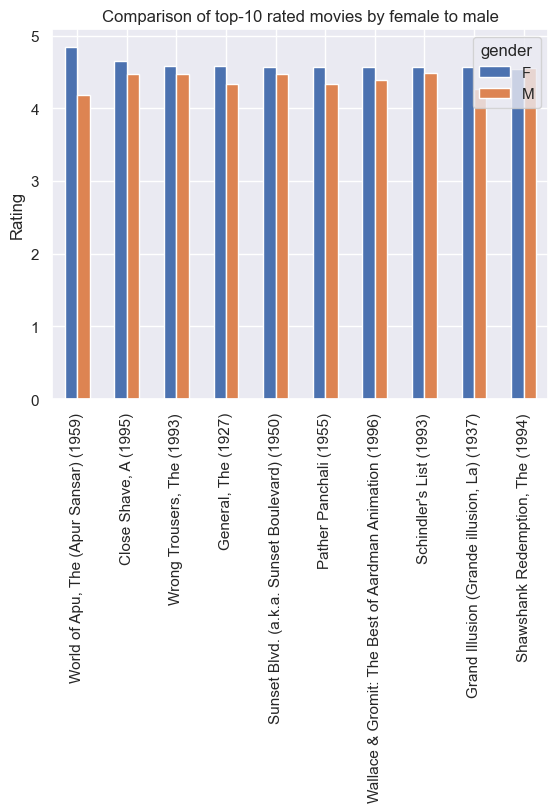

In [25]:
import seaborn as sns
sns.set()
top10_female_movies_to_male[:10].plot.bar(title='Comparison of top-10 rated movies by female to male', ylabel ='Rating', xlabel="")